In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt 
import seaborn as sns
from PIL import Image
import os
import glob
import cv2


Image.MAX_IMAGE_PIXELS = 933120000


In [20]:
sns.set(context='talk', style='white', rc={'figure.facecolor':'white'}, font_scale=1)
sns.set_style('ticks')

In [8]:
os.chdir("sample_breast_cancer_data")

# load in sample data 

In [98]:
def convert(input_name):

    img = np.asarray(Image.open(input_name).convert("RGB"))  # open image
    img = cv2.resize(img, (224, 224))  # resize to 100 pixels by 100 pixels
    
    return img 

In [99]:
def get_data_labels(input_directories):
    labels = []
    data = []
    filenames = []
    
    for input_dir in input_directories:
        for i, filename in enumerate(os.listdir(input_dir)):

            input_name = f"{input_dir}/{filename}"
            input_type = input_dir.split("/")[0]

            if "benign" in input_dir: 
                labels.append(0)
            else: 
                labels.append(1)

            img = convert(input_name)
            data.append(np.array(img))

    labels = np.array(labels)
    data = np.array(data)

    return labels, data 

In [100]:
test_labels, test_data = get_data_labels(["test/benign", "test/malignant"])
training_labels, training_data = get_data_labels(["training/benign", "training/malignant"])

In [101]:
training_data.shape, training_labels.shape

((30, 224, 224, 3), (30,))

# process data

In [102]:
x_train = training_data.astype("float32") / 255
x_test = test_data.astype("float32") / 255

In [103]:
x_train.shape, x_test.shape

((30, 224, 224, 3), (10, 224, 224, 3))

In [17]:
y_train = keras.utils.to_categorical(training_labels, num_classes= 2)
y_test = keras.utils.to_categorical(test_labels, num_classes= 2)

In [18]:
y_train.shape, y_test.shape

((30, 2), (10, 2))

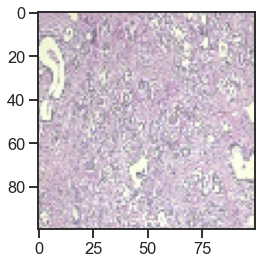

In [21]:
plt.imshow(x_train[0])
plt.show()

# model 

In [22]:
input_shape = x_train.shape[1:]
num_classes = y_train.shape[1]

In [23]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0         
_________________________________________________________________
dropout (Dropout)            (None, 33856)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 6

2021-11-16 11:19:12.973739: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
history = model.fit(x_train, y_train, batch_size=5, epochs=5, validation_split=0.1)

2021-11-16 11:19:15.157410: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/5
6/6 [==============================] - 1s 95ms/step - loss: 0.7510 - accuracy: 0.4616 - val_loss: 0.7737 - val_accuracy: 0.0000e+00
Epoch 2/5
6/6 [==============================] - 0s 47ms/step - loss: 0.7335 - accuracy: 0.4558 - val_loss: 0.8444 - val_accuracy: 0.0000e+00
Epoch 3/5
6/6 [==============================] - 0s 45ms/step - loss: 0.6843 - accuracy: 0.5878 - val_loss: 0.8275 - val_accuracy: 0.0000e+00
Epoch 4/5
6/6 [==============================] - 0s 50ms/step - loss: 0.6615 - accuracy: 0.6340 - val_loss: 0.8231 - val_accuracy: 0.0000e+00
Epoch 5/5
6/6 [==============================] - 0s 60ms/step - loss: 0.6680 - accuracy: 0.5944 - val_loss: 0.7866 - val_accuracy: 0.0000e+00


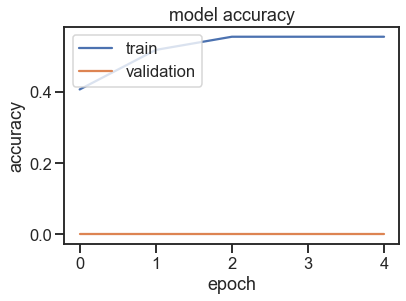

In [26]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc='upper left')
plt.show()

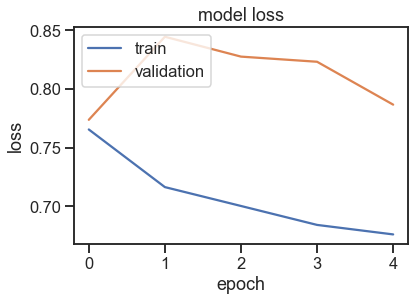

In [27]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc='upper left')
plt.show()

# evaluate

In [28]:
model.evaluate(x_test, y_test, verbose=0)

[0.7499516010284424, 0.5]

# pretrained networks 

In [29]:
from tensorflow.keras.applications import (vgg16, resnet50, mobilenet,inception_v3)


## load pretrained model

In [31]:
model = vgg16.VGG16(include_top=False)

58892288/58889256 [==============================] - 2s 0us/step


In [91]:
new_input = keras.Input(shape=input_shape)
model = vgg16.VGG16()

In [92]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [93]:
# # add new classifier layers
# flat1 = Flatten()(model.layers[-1].output)
# class1 = Dense(1024, activation='relu')(flat1)
# output = Dense(10, activation='softmax')(class1)

## predict

In [104]:
test = x_test[0, :, :, :]

In [105]:
test = test.reshape((1, test.shape[0], test.shape[1], test.shape[2]))

In [106]:
prepared_images = vgg16.preprocess_input(test)

In [107]:
yhat = model.predict(prepared_images)

In [108]:
yhat.shape

(1, 1000)

In [113]:
label = vgg16.decode_predictions(yhat)

In [114]:
label

[[('n03729826', 'matchstick', 0.075721286),
  ('n01930112', 'nematode', 0.047412653),
  ('n03666591', 'lighter', 0.030544633),
  ('n03196217', 'digital_clock', 0.028990611),
  ('n04286575', 'spotlight', 0.023574146)]]

## fit to our data 

In [115]:
input_shape = x_train.shape[1:]
num_classes = y_train.shape[1]

In [117]:
model = vgg16.VGG16(include_top=False, input_shape=input_shape)

In [123]:
flat1 = layers.Flatten()(model.layers[-1].output)
class1 = layers.Dense(1024, activation='relu')(flat1)
output = layers.Dense(num_classes, activation='softmax')(class1)
# define new model
model = keras.Model(inputs=model.inputs, outputs=output)

In [124]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [125]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [126]:
history = model.fit(x_train, y_train, batch_size=5, epochs=5, validation_split=0.1)

Epoch 1/5
6/6 [==============================] - 30s 4s/step - loss: 5.2551 - accuracy: 0.4508 - val_loss: 3.0801 - val_accuracy: 0.0000e+00
Epoch 2/5
6/6 [==============================] - 26s 4s/step - loss: 1.4995 - accuracy: 0.3787 - val_loss: 0.8993 - val_accuracy: 0.0000e+00
Epoch 3/5
6/6 [==============================] - 25s 4s/step - loss: 2.2541 - accuracy: 0.5395 - val_loss: 0.7967 - val_accuracy: 0.0000e+00
Epoch 4/5
6/6 [==============================] - 24s 4s/step - loss: 0.6981 - accuracy: 0.5163 - val_loss: 0.8254 - val_accuracy: 0.0000e+00
Epoch 5/5
6/6 [==============================] - 41s 7s/step - loss: 0.6890 - accuracy: 0.5363 - val_loss: 0.8146 - val_accuracy: 0.0000e+00


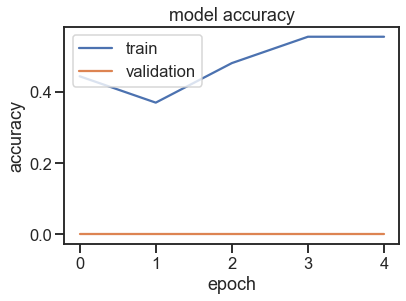

In [127]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc='upper left')
plt.show()

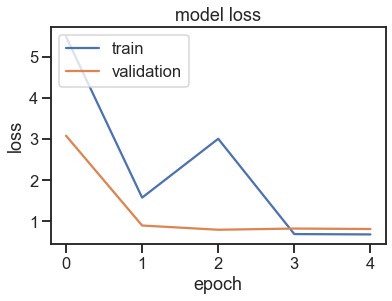

In [128]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc='upper left')
plt.show()

In [129]:
model.evaluate(x_test, y_test, verbose=0)

[0.6595332026481628, 0.5]